<a href="https://colab.research.google.com/github/ev1025/1day1commit/blob/main/Section3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N331 Docker 왜이래

- 애플리케이션 실행환경을 코드로 작성하여 OS를 격리하고 관리하는 기술
- \$ echo $HOME : 홈디렉토리 경로 출력
- 운영체제, IP, PORT번호를 일관되게 맞춰주는 역할
- 가상머신(Virtua Machine)기술은 내 운영체제(Host OS) 위에 Guest OS를 띄우는 방식(훨씬 더 견고한 격리성)
- 도커가 격리성은 떨어지지만, 컴퓨터에 부담이 덜되기 때문에 좋은 성능을 보인다.


- Docker docs(CLI명령어) : https://docs.docker.com/engine/reference/commandline/container_run/
- Docker HUB(Image 검색) : https://hub.docker.com/


### Linux Container

- 필요한 라이브러리와 어플리케이션을 모아서 별도의 서버처럼 구성한 것
- 네트워크 설정, 환경 변수 등 시스템자원은 각 컨테이너가 독립적으로 소유
- 프로세스 구획화
   - 컨테이너 안의 프로세스는 다른 컨테이너의 프로세스에 영향을 주지 않음
   - 특정 컨테이너에서 작동하는 프로세스는 다른 컨테이너에서 엑세스할 수 없음
- 네트워크의 구획화 : 기본적으로 컨테이너 하나에 하나의 IP주소가 할당
- 파일시스템의 구획화 : 한 컨테이너에서의 명령이나 파일등은 액세스를 제한 할 수 있음


### Docker CLI

- Container <-> Images  <-> Registry
- Container : 실행 된 Images (프로세스와 비슷함)
- Images : 실행시킬 코드 (프로그램과 비슷함)
- Registry : 실행시킬 코드들이 저장되어있는 장소(레포지토리와 비슷함)


#### docker Image 

- Registry_Account / Repository_name : Tag
- 레지스트리 : 도커 이미지 저장공간 (특별히 지정하지 않으면 도커허브를 기본 레지스트리로 사용)
- 레포지토리 : 레지스트리 내에 도커 이미지가 저장되는 공간(이미지의 이름이 사용되기도 함)
- 태그 : 이미지의 버전정보(지정하지 않으면, latest태그 가져옴)
- docker/whalesay   
==> Docker Hub(레지스트리)에서 docker가 올린 whalesay(레포지토리)에서 latest(태그)를 가진 이미지

In [ ]:
$ docker image pull docker/whalesay:latest # docker에서 whalesay 이미지의 마지막버전 불러오기

In [ ]:
$ docker image ls # 이미지 리스트 출력

### Docker Container

- container run : 새로운 컨테이너에서 명령실행   
- $  docker container run [OPTIONS] IMAGE [COMMAND]  [ARG...]
- -it, -e 등은 option image는 --name, command는 bash or cowsay 등등

In [ ]:
$ docker container run   --name     myname     docker/whalesay:latest   cowsay    boo  # 커맨드 호출하지 않으면 안나옴
      #  컨테이너실행   이름할당 (컨테이너명) (레지스트리/이미지:포트) (command) (arg)

$ docker container run --name my_name --rm docker/whalesay cowsay boo  
# 컨테이너 실행 후 중단되면 컨테이너 지움

In [ ]:
$ docker container ps    # 실행중인 컨테이너 조회
$ docker container ps -a # 모든 컨테이너 조회

In [ ]:
$ docker start <컨테이너명>  #  컨테이너 실행
$ docker stop  <컨테이너명>  #  컨테이너 종료

# 삭제 전 컨테이너에서 실행 멈출 것
docker container rm <컨테이너명> # 컨테이너 삭제
docker rmi <이미지명>            # 이미지 삭제 뒤에 -f 붙이면 컨테이너에서 실행중에도 강제 삭제

In [ ]:
$ winpty docker exec -it <컨테이너명> /bin/bash # 컨테이너 들어가기
# 안되면/bin/bash를 bash, /bin/sh, sh 중 하나로 실행(bash가 됐었음)
# Ctrl+z = 터미널 나오기

In [ ]:
$ winpty docker container run -it --rm danielkraic/asciiquarium 
# -it는 사용자와 컨테이너 간 인터렉션이 필요할 때 사용(화면이 움직여서) winpty 필수
# 파이썬명령이나 추가입력을 받을 때 사용(Ctrl+c로 종료)

In [ ]:
docker container run --name myjupyter --rm -p 10000:8888 jupyter/minimal-notebook # 주피터 노트북 실행

docker container stop jupyter # 주피터 도커 끄기

lab 말고 노트북 실행하고 싶으신 분들은 
-e DOCKER_STACKS_JUPYTER_CMD = notebook 을 환경변수로 주시면 됩니다. 노트북 실행의 디폴트는 lab입니다


### Docker cp / Dockerfile

- Docker cp : 호스트와 컨테이너 간 파일 복사
- Docker Volumne : 호스트와 컨테이너 사이의 공간을 마운트
- 웹서버에서 도커를 컨테이너로 실행하면 서버를 닫고 다시 구동하면 된다는 장점이 있다.


#### httpd웹서버

- http daemon : Apache HTTP Server를 실행할 수 있는 오픈소스 웹 서버 소프트웨어
- `/usr/local/apache2/htdocs/` 경로에 웹서버 관련 파일이 저장되어 있으면 해당 파일을 기반으로 웹서버 실행

In [ ]:
# 1. 팩맨 받기
$ git clone url https://github.com/codestates/pacman-canvas 

In [ ]:
# 2. 터미널을 꼭 2개 켠 뒤 httpd에 연결, 실행
$ docker container run --name (컨테이너이름) --rm -p 818:80 httpd # myip : 818, 컨테이너포트 80                       

# 3. 주소창에 127.0.0.1:818 혹은 localhost:818 => It works!
# docker image ls치면 이미지에 httpd 생기고, game컨테이너 실행됨

In [ ]:
# 4. 팩맨폴더(CLI)로 이동해서 
$ docker container cp  [현재경로(./)] [컨테이너이름]:/usr/local/apache2/htdocs/ # httpd의 기본경로

# 5. 127.0.0.1:818 혹은 localhost:818를 인터넷창에 치면 팩맨 실행될 것

#### Docker Image 만들기

In [ ]:
$ docker container commit my_web my_pacman:1.0     # 팩맨1.0 이미지 생성

In [ ]:
$ docker run --name my_web2 -p 900:80 my_pacman:1.0 # 이미지 포트900에서 구동

Dockerfile로 이미지 만들기

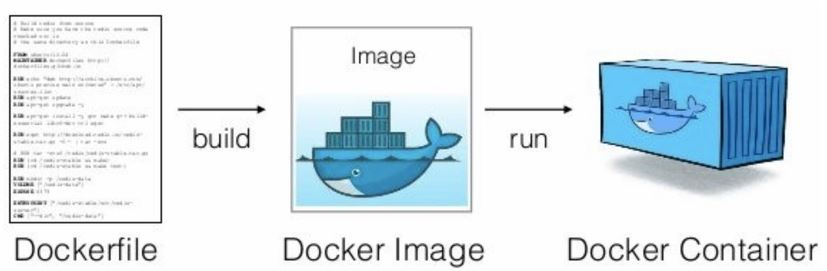

- Dockerfile을 만들고 파일대로 Image를 Build
- VScode에 Dockfile생성 후 입력
- 공식문서 : https://docs.docker.com/engine/reference/builder/

In [ ]:
# Dockerfile에서 작성하는 것
FROM httpd:2.4 # 베이스이미지를 httpd:2.4로 사용
WORKDIR /usr/local/apache2       # 컨테이너 기본 작업경로
CP ./ /usr/local/apache2/htdocs/ # 파일생성할 이미지를 ./에서 /usr/local/apache2/htdocs/로 이동

In [ ]:
# CLI에서 작성하는것
# Dockerfile을 바탕으로 도커 이미지파일 생성
$ docker build --tag my_pacman:2.0 ./
# (./)의 Dockerfile을 찾아서 빌드(이미지파일 생성), --tag는 name:tag형식으로 이미지 생성

In [ ]:
$ docker run --name my_web3 -p 901:80 my_pacman:2.0 # 생성된 이미지로 901포트 구동

#### 기타 사용법들

- $ winpty docker run -i -t -p 8888:8888 continuumio/miniconda3 /bin/bash \ # 미니콘다 설치   
 -c

- run : 새로운 컨테이너 실행
- -i(--interactive) : 연결되지 않은 경우에도 STDIN을 열어 두십시오. 
- -t(-tty) : 의사 TTY 할당 # -it는 컨테이너와 입출력을 상호작용하도록 해줌(생성과 동시에 컨테이너 실행)
- -d : 정지된 컨테이너를 생성(백그라운드에서 돌아감)
- -p(--publish) : 컨테이너의 포트를 호스트에 게시
- -P(--publish-all) : 노출된 모든 포트를 임의의 포트에 게시
- /bin/bash : bash로 실행됨을 의미
- -c(--cpu-shares) : CPU사용량을 제한하는 명령어(컨테이너 간 상대적 가중치)
- -e 환경변수이름=환경변수값   
ENV와 ARG의 차이   
https://stackoverflow.com/questions/39597925/how-do-i-set-environment-variables-during-the-build-in-docker/63640896#63640896


*STDIN : Standard Input의 약자, 프로그램으로 들어가는 데이터(보통은 문자열) 스트림이다. 

### Docker-compose.yaml

- 두 개의 도커 이미지를 하나의 컨테이너로 연결하는 방법(하나의 컨테이너에는 동일한 네트워크 사용)
- docker-compose up: docker-compose.yaml 파일에 정의된 서비스를 컨테이너로 실행할 때 사용됩니다.
- docker-compose down: docker-compose.yaml 파일에 정의된 서비스를 컨테이너를 종료할 때 사용됩니다
- docker-compose up {특정 서비스}: 특정 서비스만 컨테이너로 실행할 때 사용됩니다
- compose 공식문서 : https://docs.docker.com/compose/compose-file/

In [ ]:
# docker-compose 버전
version: '3.7'

# 사용할 container
services: # services 문법이기 때문에 변경하면 안 됩니다.
  express:
    ports:
     - '3000:3000'
    # 웹 서버
    image : 'jmuppala/node-server' # 레포지토리 이미지
    container_name: 'web'          # 컨테이너 개별이름

    command : ["./wait-for-it.sh", "mongodb:27017","--","npm","start"] # 변경하지 말아주세요!

  mongodb: 
    image : 'jmuppala/mongo-server'
    container_name: 'mongo'

# docker-compose.yaml 파일 만들고
# port 추가, 각 image 추가하고, 레포지토리의 이미지 부분 작성
# 컨테이너 이름 작성
# CLI로 yaml파일 경로로 가서 docker compose up 입력
# 주소창에 localhost3000 확인

# 2개의 이미지가 1개의 컨테이너에 묶임
# 몽고DB는 외부와 연결될 필요가 없어서3000:3000포트에는 WEB이미지만 연결

# N332 Flask

- Python을 사용한 웹애플리케이션 개발도구
- 마이크로 웹 프레임워크로 뭔가 만들어 낼 수 있는 도구모음을 제공

In [ ]:
pip istall flask

In [ ]:
$ mkdir flask_app

In [ ]:
$ touch /flask_app/__init__.py # 해당 디렉토리를 패키지로 인식(python 3.3 이후에는 없어도 패키지로 인식함)

In [ ]:
$ code ./ (__init__.py)

In [ ]:
# __init__.py파일로 어플리케이션 만들기 (블루프린트 관련은 ##)
from flask import Flask
from flask_app.routes import user_routes ## flask_app.routes 경로의 user_routes파일 연결

app = Flask(__name__) # 해당 어플리케이션 이름
app.resgister_bluteprint(user_routes.bp) ## 유저라우트의.블루프린트를 가져옴

# 127.0.0.1:5000 + '/' 에 접속하면 아래 내용이 나옴
# FLASK는 http request 메소드 GET, HEAD, OPTIONS만 허용 추가하려면 methods 사용
@app.route('/', methods = ['POST'])  #endpoint('/')를 지정, 컨트롤누르고 데코레이터를 누르면 함수 볼 수 있음
def index():
    return 'str or dict or tuple', 200(response code) # (사이트 출력값, <reponse 200> f12 검사에서 나옴)

# 127.0.0.1:5000/user/userid 아무거나 입력하면
@app.route('/user/', default={'user_id'=0})
@app.route('/user/<user_id>')
def user_index():
    return f"Here is your id : {user_id}" # 화면 출력값


if __name__ == '__main__':
    app.run(debug=True)   # debug=True는 웹페이지 끄지 않고도 업데이트내역을 바로바로 적용해줌

#### 블루프린트 : route들을 기능별로 별도의 파일로 묶어주는 작업


In [ ]:
$ cd flask_app # 플라스크 폴더 들어감

In [ ]:
$ mkdir routes # 라우트폴더 만듬

In [ ]:
$ touch /routes/user_routes.py # user_routes.py를 라우트폴더에 만듬

In [ ]:
$ code ./ # flask_app폴더에서 user_routes.py 실행

In [ ]:
# user_routes.py 파일에서
from flask import Blueprint

# (블루프린트명, 블루프린트 import이름, 포트번호뒤에 자동으로 붙을 주소(선택사항))
bp = Blueprint('main', __name__, url_prefix='/main')

# 127.0.0.1:5000/main/ 에 접속하면 'hi main index' 출력
@bp.route('/')
def main_index():
    return 'hi main index'

In [ ]:
# 실행 방법(Ctrl+C로 종료)

# 1. Flask폴더 내부에서 실행
$ flask run
$ python __init__.py # __init__ 파일 밑에 app.run() 지정해놓고 실행(앱이 여러개일 경우 app.run(host:0.0.0.0))

# 2. Flask폴더 상위 폴더에서 실행 (앱파일이 __init__.py형식이 아닐경우 실행안됨)
$ FLASK_APP = flask_app flask run

# 3. vscode로 그냥 재생누르면 켜짐

# 4. debug 무시되는 실행
$ FLASK_APP=mini_flask_app FLASK_ENV=development flask run

#### Render_template : html 형식을 app으로 가져옴

In [ ]:
$ mkdir templates

In [ ]:
$ touch /templates/index.html

In [ ]:
# index.html
<html>
  <head>
    <title>
      New HTML Page
    </title>
  </head>
  <body>
    <h1>I am in templates folder</h1>
    <h2>Apple is {{ fruit_color }}</h2>   ## jinja
    <h2>{{ number }} 개의 과일이 있습니다.</h2>## jinja
  </body>
</html>

In [ ]:
# __init__.py
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html', fruit_color=apple, number=apple_count) ## + jinja

 ### Jinja

- flask에서 만든 template engine
- 공식문서 https://jinja.palletsprojects.com/en/2.11.x/templates/#variables

In [ ]:
{{변수명}} : html에 출력할 변수
{#.. #}    : 주석
{%.. %}    : 구문(if, for 등)

In [ ]:
# 딕셔너리 전달

# flask파일
fruits = { 'apple' : 'red', 'banana' : 'yellow' } 

# html파일
{{ fruits.apple }}
>>> 'red'

In [ ]:
# http에서 구문 사용(if, for)

# if
{% if True %}
<h1>It is True</h1>
{% elif False %}
<h1>It is False</h1>
{% else %}
<h1>It is not True</h1>
{% endif %}

# for
{% for item in item_list %}
<p>{{ item }}</p>
{% endfor %}

# loop.index
{{loop.index}}  # 1부터 증가
{{loop.index0}} # 0부터 증가
{{loop.first}}  # 반복순서 처음이면 True
{{loop.last}}   # 반복순서 마지막이면 True

In [ ]:
# Jinja 상속(상속받을 html도 같은 폴더에 있어야함)
{% extends '참고할.html' %} # 해당파일은 참고할.html파일에서 상속받아서 block부분만 변경해주면됨
{% block 태그or클래스 %} 내용 {% endblock %}
{% block 태그or클래스 %} {{super()}} {% endblock %}      # 부모 내용상속
{% block 태그or클래스 %} {{super.super()}} {% endblock %}# 조부모내용상속 

### Bootstrap : css나 html을 짜놓은 도구들(긁어오기만 하면됨)

# N333 배포 (HEROKU,  METADATA)

- Flask run 은 Werkzeug라는 작은 웹서버같은 환경에서 실행하는 것이다.
- WSGI(web server gateway interface) : 서버나 게이트웨이를 애플리케이션이나 프레임워크와 이어주는 역할(middleware)

## gunicorn

- green unicorn의 줄임말, 파이썬의 WSGI HTTP Server
- HTTP관련 웹 요청이 들어오면 FLASK같은 애플리케이션을 이용해 처리해주는 역할
- UNIX체계에서 작동하며, 작동방식은 pre-fork-worker모델
- 사전에 파이썬에서 프레임워크나 애플리케이션이 주어지면 포킹한 뒤 worker를 통해 작업을 실행
- 서버를 띄울 때 worker 수를 정해 하나의 app을 몇개 띄우는지 정할 수 있음
- 공식문서 https://docs.gunicorn.org/en/latest/run.html


In [ ]:
$ pip install gunicorn

In [ ]:
# window에서 설치가 안되면
$ pip freeze 에서 확인
$ pip freeze > requirements.txt
$ code ./requirements.txt
txt에 gunicorn==20.1.0 입력

In [ ]:
# 구니콘 실행  
$ gunicorn --workers=1 'flask_app:create_app()'
#             [옵션]     [WSGI 애플리케이션] 

$ gunicorn --workers=4 flask_app:app
# 모듈 내에서 바로 접근이 가능한 경우 ''를 하지 않아도 됨

## Heroku

- 클라우드플랫폼 제공 서비스
- CLI와 GIT을 사용하여 편리함
- AWS EC2는 서버를 구축해야하고, 히로쿠는 APP만 올리면 알아서 배포
- 인스톨 : https://devcenter.heroku.com/articles/heroku-cli

In [ ]:
$ heroku login

In [ ]:
# 등록된 앱 목록 확인
$ heroku apps 

# 앱정보 확인(git 등록 안되어 있을 때)
$ heroku apps:info --app 앱이름

# git 등록되어있을 때
$ heroku apps:info

In [ ]:
# 새로운 앱 생성
$ heroku create 앱이름(소문자,특수문자,중복 안됨)
# 접속주소 / 깃주소 출력됨

In [ ]:
# Heroku가 web서버를 실행하기 위해 꼭 있어야하는 정보
# 1.requirements.txt - Python 패키지정보
$ pip freeze > requirements.txt 
# 목록 맨위에 certifi? 정보 있으면 주석처리하기

# 2. Procfile - 웹서버 구동정보
$ touch Procfile
$ code Procfile    
web: gunicorn --workers=1 'flask_app:create_app()' # Procfile에 작성
# 구니콘이라는 웹서버에 1명의 사용자가 들어와서 create_app()을 사용한다.

# 3. Procfile, requirements.txt, 앱폴더가 같은 경로에 있어야함 

In [ ]:
# 깃 설정
$ git init
$ git remote add heroku 깃주소
$ git add ./
$ git commit -m '메세지'
$ git push heroku (master or main)
# 완료되면 접속주소로 접속하면 실행 됨
# 오류나면 heroku log --tail 복사해서 CLI에 실행하면 오류 볼 수 있음

#### flask로 그냥 웹 배포하는거

In [ ]:
# 앱실행
$ FLASK_APP = 앱폴더이름 flask run --host 0.0.0.0
# 구글에 내 아이피주소 검색
# 인터넷 창에 내 아이피주소:포트번호
# 공인아이피가 아닐 경우 안될 수 있음